In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Создание необходимых директорий
os.makedirs('../visualizations', exist_ok=True)
os.makedirs('../data', exist_ok=True)

print("Библиотеки загружены, структура папок проверена.")

Библиотеки загружены, структура папок проверена.


In [19]:
import sys
import time

t0 = time.perf_counter()
import numpy as np
t1 = time.perf_counter()
import pandas as pd
t2 = time.perf_counter()

print('Python version:', sys.version.split()[0])
print(f'Import NumPy:  {t1 - t0:.3f}s (v{np.__version__})')
print(f'Import Pandas: {t2 - t1:.3f}s (v{pd.__version__})')

Python version: 3.13.2
Import NumPy:  0.000s (v2.2.5)
Import Pandas: 0.000s (v2.3.2)


In [20]:
from pathlib import Path

# Определяем пути к папкам
VIZ_DIR = Path('../visualizations')
DATA_DIR = Path('../data')

# Создаем папки, если их нет
VIZ_DIR.mkdir(parents=True, exist_ok=True)
DATA_DIR.mkdir(parents=True, exist_ok=True)

import matplotlib.pyplot as plt
print('Директория для графиков:', VIZ_DIR.resolve())

Директория для графиков: /drive/notebooks/deeplearning ai coursera/visualizations


In [6]:
# Создание многомерного массива
arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print(f"Размер массива: {arr.shape}")
print(f"Среднее значение: {arr.mean()}")
print(f"Сумма по столбцам (axis=0): {arr.sum(axis=0)}")

# Векторизованная операция: возведение в квадрат [cite: 465-467]
arr_squared = arr ** 2
print("\nМассив после возведения в квадрат:\n", arr_squared)

Размер массива: (3, 3)
Среднее значение: 5.0
Сумма по столбцам (axis=0): [12 15 18]

Массив после возведения в квадрат:
 [[ 1  4  9]
 [16 25 36]
 [49 64 81]]


In [9]:
# Загрузка данных из CSV
# Убедись, что файл лежит в папке seminar-01/data/
df = pd.read_csv('data.csv')

# Адаптация колонок Kaggle под требования семинара
if 'EstimatedSalary' in df.columns:
    df.rename(columns={'EstimatedSalary': 'Salary'}, inplace=True)

# Очистка данных: удаление строк с пропусками [cite: 441-445]
df.dropna(inplace=True)

print("Первые 5 строк датасета:")
print(df.head())

Первые 5 строк датасета:
    User ID  Gender  Age  Salary  Purchased
0  15624510    Male   19   19000          0
1  15810944    Male   35   20000          0
2  15668575  Female   26   43000          0
3  15603246  Female   27   57000          0
4  15804002    Male   19   76000          0


In [23]:
# Загрузка и удаление полных дубликатов строк
df_clean = df.drop_duplicates().copy()

# Заполнение пропусков медианой (вместо простого удаления)
# Это более продвинутый метод, сохраняющий объем данных [cite: 280]
df_fill = df_clean.copy()
df_fill['Age'] = df_fill['Age'].fillna(df_fill['Age'].median())
df_fill['Salary'] = df_fill['Salary'].fillna(df_fill['Salary'].median())

print(f"Строк до очистки: {len(df)}, после: {len(df_fill)}")

Строк до очистки: 400, после: 400


In [10]:
# Статистическое описание числовых столбцов
print("Описательная статистика:")
print(df.describe())

# Фильтрация данных (пример из семинара)
high_salary_df = df[df['Salary'] > df['Salary'].mean()]
print(f"\nКоличество записей с зарплатой выше средней: {len(high_salary_df)}")

Описательная статистика:
            User ID         Age         Salary   Purchased
count  4.000000e+02  400.000000     400.000000  400.000000
mean   1.569154e+07   37.655000   69742.500000    0.357500
std    7.165832e+04   10.482877   34096.960282    0.479864
min    1.556669e+07   18.000000   15000.000000    0.000000
25%    1.562676e+07   29.750000   43000.000000    0.000000
50%    1.569434e+07   37.000000   70000.000000    0.000000
75%    1.575036e+07   46.000000   88000.000000    1.000000
max    1.581524e+07   60.000000  150000.000000    1.000000

Количество записей с зарплатой выше средней: 201


In [24]:
numeric_cols = ['Age', 'Salary']
df_norm = df_fill.copy()

for col in numeric_cols:
    col_min = df_norm[col].min()
    col_max = df_norm[col].max()
    # Приводим значения к диапазону от 0 до 1 
    df_norm[col + '_norm'] = (df_norm[col] - col_min) / (col_max - col_min)

print("Данные после нормализации:")
print(df_norm[[col + '_norm' for col in numeric_cols]].head())

Данные после нормализации:
   Age_norm  Salary_norm
0  0.023810     0.029630
1  0.404762     0.037037
2  0.190476     0.207407
3  0.214286     0.311111
4  0.023810     0.451852


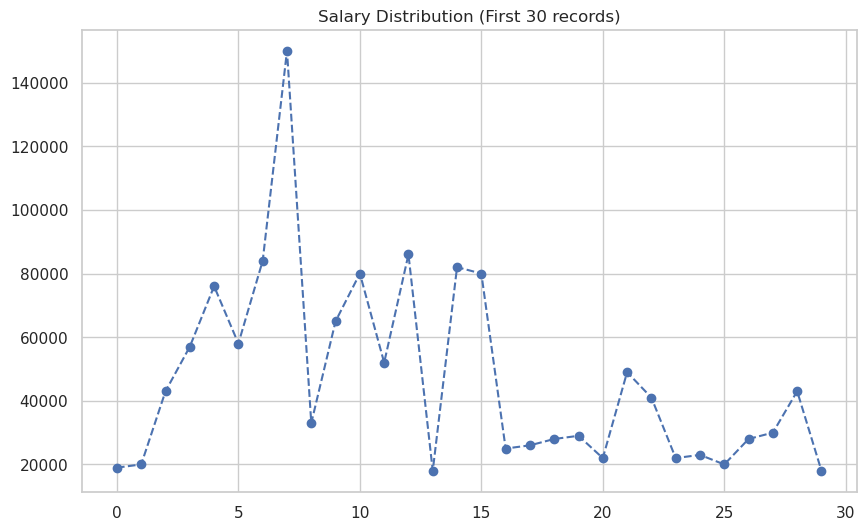

In [11]:
sns.set(style="whitegrid")

# 1. Линейный график распределения зарплат
plt.figure(figsize=(10, 6))
plt.plot(df.index[:30], df['Salary'][:30], marker='o', color='b', linestyle='--')
plt.title('Salary Distribution (First 30 records)')
plt.savefig('../visualizations/salary_distribution_line.png')
plt.show()


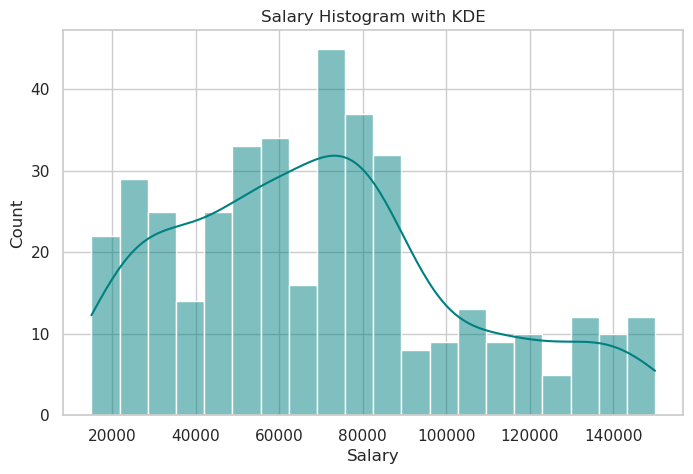

In [14]:
# 2. Гистограмма распределения [cite: 142-145]
plt.figure(figsize=(8, 5))
sns.histplot(df['Salary'], bins=20, kde=True, color='teal')
plt.title('Salary Histogram with KDE')
plt.savefig('../visualizations/salary_hist_kde.png')
plt.show()

<ipython-input-15-654da1c96b24>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Salary', data=df, palette='Set2')


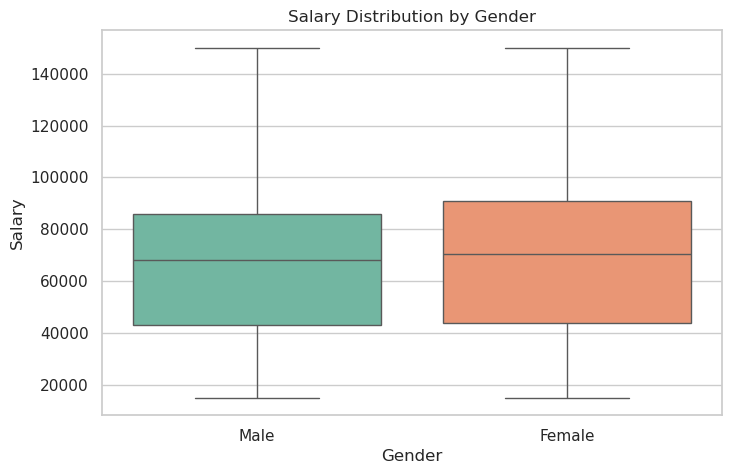

In [15]:
# 3. Боксплот (Зарплата по полу) - Аналог "Salary by City"
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Salary', data=df, palette='Set2')
plt.title('Salary Distribution by Gender')
plt.savefig('../visualizations/salary_by_gender_boxplot.png')
plt.show()

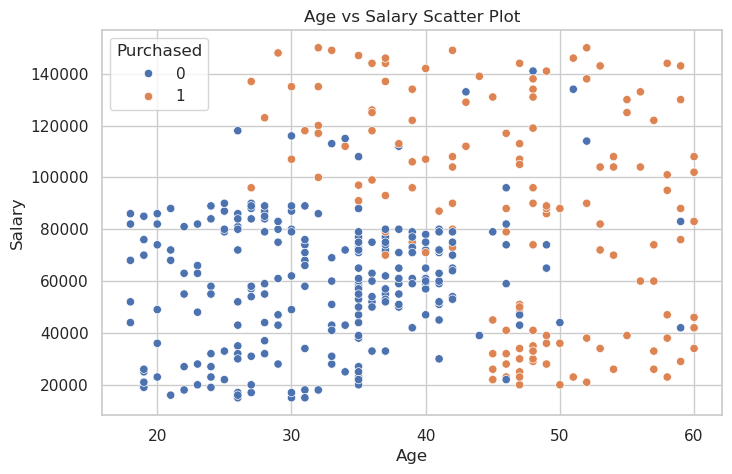

In [16]:
# 4. График рассеяния (Age vs Salary) [cite: 156-157]
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Salary', hue='Purchased', data=df)
plt.title('Age vs Salary Scatter Plot')
plt.savefig('../visualizations/age_vs_salary_scatter.png')
plt.show()

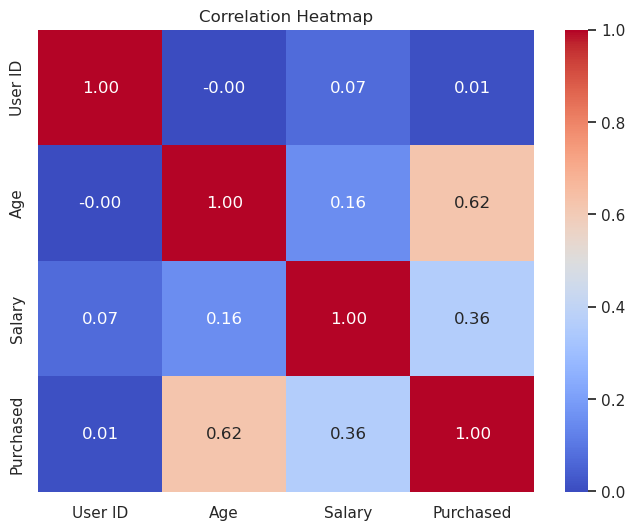

In [18]:
# 5. Тепловая карта корреляции [cite: 161-162]
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.savefig('../visualizations/correlation_heatmap.png')
plt.show()